## PLAN ##

- **Data Analysis**
- **Preprocessing**
- **Data Analysis**
- **Prediction/Training**
- **Resultat**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

## 1.Data Analysis ##

Certains features ( la majororité d'ailleurs) ne sont pas disponibles directement dans le dataset que nous utilisons.

Il faut donc creer certains de ces features à partir de ce dataset, features engineering.

Voici les features dont nous aurons besoins pour notre travail:
- Nombre de victoires
- Nombre de défaites
- Nombre de nuls
- Nombre de buts 
- Nombre de points
- Forme sur les 5 derniers matchs (cas de victoires)
- Forme sur les 5 derniers matchs (cas de défaites)

Autres ajouts possibles:
- Buts marqués à l'exterieur
- Buts marqués à domicile
- Classement
- Tirs cadrés
- Tirs non cadrés 

Les côtes des bookmakers.

Classement de chaque joueur.

**DESCRIPTION DES ATTRIBUTS DU DATASET**

Notes for Football Data

All data is in csv format, ready for use within standard spreadsheet applications. Please note that some abbreviations are no longer in use (in particular odds from specific bookmakers no longer used) and refer to data collected in earlier seasons. For a current list of what bookmakers are included in the dataset please visit http://www.football-data.co.uk/matches.php

Key to results data:

- Div = League Division
- Date = Match Date (dd/mm/yy)
- Time = Time of match kick off
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full Time Away Team Goals
- FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG = Half Time Home Team Goals
- HTAG = Half Time Away Team Goals
- HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
- Attendance = Crowd Attendance
- Referee = Match Referee
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HHW = Home Team Hit Woodwork
- AHW = Away Team Hit Woodwork
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HFKC = Home Team Free Kicks Conceded
- AFKC = Away Team Free Kicks Conceded
- HO = Home Team Offsides
- AO = Away Team Offsides
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards
- HBP = Home Team Bookings Points (10 = yellow, 25 = red)
- ABP = Away Team Bookings Points (10 = yellow, 25 = red)

Note that Free Kicks Conceeded includes fouls, offsides and any other offense commmitted and will always be equal to or higher than the number of fouls. Fouls make up the vast majority of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not available (France 2nd, Belgium 1st and Greece 1st divisions).

Note also that English and Scottish yellow cards do not include the initial yellow card when a second is shown to a player converting it into a red, but this is included as a yellow (plus red) for European games.


Key to 1X2 (match) betting odds data:

- B365H = Bet365 home win odds
- B365D = Bet365 draw odds
- vB365A = Bet365 away win odds
- BSH = Blue Square home win odds
- BSD = Blue Square draw odds
- BSA = Blue Square away win odds
- BWH = Bet&Win home win odds
- BWD = Bet&Win draw odds
- BWA = Bet&Win away win odds
- GBH = Gamebookers home win odds
- GBD = Gamebookers draw odds
- GBA = Gamebookers away win odds
- IWH = Interwetten home win odds
- IWD = Interwetten draw odds
- IWA = Interwetten away win odds
- LBH = Ladbrokes home win odds
- LBD = Ladbrokes draw odds
- LBA = Ladbrokes away win odds
- PSH and PH = Pinnacle home win odds
- PSD and PD = Pinnacle draw odds
- PSA and PA = Pinnacle away win odds
- SOH = Sporting Odds home win odds
- SOD = Sporting Odds draw odds
- SOA = Sporting Odds away win odds
- SBH = Sportingbet home win odds
- SBD = Sportingbet draw odds
- SBA = Sportingbet away win odds
- SJH = Stan James home win odds
- SJD = Stan James draw odds
- SJA = Stan James away win odds
- SYH = Stanleybet home win odds
- SYD = Stanleybet draw odds- 
- SYA = Stanleybet away win - odds
- VCH = VC Bet home win od- ds
- VCD = VC Bet draw od- ds
- VCA = VC Bet away win odds
- WHH = William Hill h- ome win odds
- WHD = William Hill d- raw odds
- WHA = William Hill a- way win odd- - - - - - - s

- Bb1X2 = Number of BetBrain bookmakers used to calculate match odds averages and maximums
- BbMxH = Betbrain maximum home win odds
- BbAvH = Betbrain average home win odds
- BbMxD = Betbrain maximum draw odds
- BbAvD = Betbrain average draw win od- ds
- BbMxA = Betbrain maximum away win od- ds
- BbAvA = Betbrain average away win od- d- s-- -  

- MaxH = Market maximum home win od- ds
- MaxD = Market maximum draw win od- ds
- MaxA = Market maximum away win od- ds
- AvgH = Market average home win od- ds
- AvgD = Market average draw win od- ds
- AvgA = Market average away win od- d- - - - - - - - - s



Key to total goals betting odds:

- BbOU = Number of BetBrain bookmakers used to calculate over/under 2.5 goals (total goals) averages and maximums
- BbMx>2.5 = Betbrain maximum over 2.5 goals
- BbAv>2.5 = Betbrain average over 2.5 goals
- BbMx<2.5 = Betbrain maximum under 2.5 goals
- BbAv<2.5 = Betbrain average under 2.5 goals

- GB>2.5 = Gamebookers over 2.5 goals
- GB<2.5 = Gamebookers under 2.5 goals
- B365>2.5 = Bet365 over 2.5 goals
- B365<2.5 = Bet365 under 2.5 goals
- P>2.5 = Pinnacle over 2.5 goals
- P<2.5 = Pinnacle under 2.5 goals
- Max>2.5 = Market maximum over 2.5 goals
- Max<2.5 = Market maximum under 2.5 goals
- Avg>2.5 = Market average over 2.5 goals
- Avg<2.5 = Market average under 2.5 goals



Key to Asian handicap betting odds:

- BbAH = Number of BetBrain bookmakers used to Asian handicap averages and maximums
- BbAHh = Betbrain size of handicap (home team)
- AHh = Market size of handicap (home team) (since 2019/2020)
- BbMxAHH = Betbrain maximum Asian handicap home team odds
- BbAvAHH = Betbrain average Asian handicap home team odds
- BbMxAHA = Betbrain maximum Asian handicap away team odds
- BbAvAHA = Betbrain average Asian handicap away team odds

- GBAHH = Gamebookers Asian handicap home team odds
- GBAHA = Gamebookers Asian handicap away team odds
- GBAH = Gamebookers size of handicap (home team)
- LBAHH = Ladbrokes Asian handicap home team odds
- LBAHA = Ladbrokes Asian handicap away team odds
- LBAH = Ladbrokes size of handicap (home team)
- B365AHH = Bet365 Asian handicap home team odds
- B365AHA = Bet365 Asian handicap away team odds
- B365AH = Bet365 size of handicap (home team)
- PAHH = Pinnacle Asian handicap home team odds
- PAHA = Pinnacle Asian handicap away team odds
- MaxAHH = Market maximum Asian handicap home team odds
- MaxAHA = Market maximum Asian handicap away team odds	
- AvgAHH = Market average Asian handicap home team odds
- AvgAHA = Market average Asian handicap away team odds



Closing odds (last odds before match starts)

As above but with an additional "C" character following the bookmaker abbreviation/Max/Avg

Football-Data would like to acknowledge the following sources which have been utilised in the compilation of Football-Data's results and odds files.


Current results (full time, half time)
Xcores - http://www.xcores .com

Match statistics
BBC, ESPN Soccer, Bundesliga.de, Gazzetta.it and Football.fr

Bookmakers betting odds
Individual bookmakers

Betting odds for weekend games are collected Friday afternoons, and on Tuesday afternoons for midweek games.

Additional match statistics (corners, shots, bookings, referee etc.) for the 2000/01 and 2001/02 seasons for the English, Scottish and German leagues were provided by Sports.com (now under new ownership and no longer available).


In [ ]:
chemin='drive/MyDrive/Colab Notebooks/PJI/Premier League/'
dataset=pd.read_csv(chemin+'2016-17.csv')

In [ ]:
dataset

Div      Date        HomeTeam        AwayTeam  ...  BbAvAHA   PSCH   PSCD   PSCA
0    E0  13/08/16         Burnley         Swansea  ...     1.81   2.79   3.16   2.89
1    E0  13/08/16  Crystal Palace       West Brom  ...     1.85   2.25   3.15   3.86
2    E0  13/08/16         Everton       Tottenham  ...     2.00   3.64   3.54   2.16
3    E0  13/08/16            Hull       Leicester  ...     1.67   4.68   3.50   1.92
4    E0  13/08/16        Man City      Sunderland  ...     2.14   1.25   6.50  14.50
..   ..       ...             ...             ...  ...      ...    ...    ...    ...
375  E0  21/05/17       Liverpool   Middlesbrough  ...     1.90   1.15  10.50  19.09
376  E0  21/05/17      Man United  Crystal Palace  ...     1.79   2.35   3.38   3.35
377  E0  21/05/17     Southampton           Stoke  ...     1.88   1.64   4.37   5.53
378  E0  21/05/17         Swansea       West Brom  ...     1.82   2.29   3.45   3.40
379  E0  21/05/17         Watford        Man City  ...     1.93  18.00   9.70   1.16

[380 rows x 65 columns]

In [ ]:
#dataset.drop(dataset.tail(1).index,inplace=True)

In [ ]:
from datetime import datetime as dt
def parser_date(date):
    """
    Parseur pour les dates, convertir la colonne date en objet date pour faciliter le traitement
    """
    if date=="":
        return None
    else:
        #print(date)
        try:
            res=dt.strptime(date,"%d/%m/%y").date()
        except:
            res=dt.strptime(date,"%d/%m/%Y").date()
        finally:
            return res

In [ ]:
dataset.Date=dataset.Date.apply(parser_date)

Nous devons generer certains features pour un premier temps:
- Les buts encaisses
- Les but marques 
- Points obtenus par match
- Nombre de points cumules
- Nombre de victoires
- Nombre de defaites

**PLACE AUX BUTS**

In [ ]:
column = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']
#Div	Date	Time	HomeTeam	AwayTeam	FTHG	FTAG	FTR	HTHG	HTAG	HTR	Referee	
playing_stat=dataset[column]

In [ ]:
playing_stat

Date        HomeTeam        AwayTeam  FTHG  FTAG  ...  AC  HY  AY  HR  AR
0    2016-08-13         Burnley         Swansea     0     1  ...   4   3   2   0   0
1    2016-08-13  Crystal Palace       West Brom     0     1  ...   6   2   2   0   0
2    2016-08-13         Everton       Tottenham     1     1  ...   6   0   0   0   0
3    2016-08-13            Hull       Leicester     2     1  ...   3   2   2   0   0
4    2016-08-13        Man City      Sunderland     2     1  ...   6   1   2   0   0
..          ...             ...             ...   ...   ...  ...  ..  ..  ..  ..  ..
375  2017-05-21       Liverpool   Middlesbrough     3     0  ...   3   0   1   0   0
376  2017-05-21      Man United  Crystal Palace     2     0  ...   6   2   0   0   0
377  2017-05-21     Southampton           Stoke     0     1  ...  10   2   4   0   0
378  2017-05-21         Swansea       West Brom     2     1  ...   4   1   1   0   0
379  2017-05-21         Watford        Man City     0     5  ...   5   1   0   0   0

[380 rows x 18 columns]

In [ ]:
def my_normaliser(df):
  for i in range(len(df)):
    df.iloc[i]/=(i+1)
  return df 

In [ ]:
def get_goals_scored(dataset):
  """
  Cette fonction permet de calculer, les buts marques a domicile, exterieur, et le total de buts, 
  pour toutes les equipez le dataset
              Parameters:
                    df (DataFrame): dataset 

            Returns:
                    df (DataFrame): dataset avec les nouvelles informations
  """
  def cumulative_func(df,team):
    """
    Cette fonction aide a calculer les nombre total de but (Helper function)
            Parameters:
                    df (DataFrame): dataset 
                    team (string): Nom de l'equipe

            Returns:
                    df (DataFrame): dataset avec les nouvelles informations
    """
    res=0
    for j,i in enumerate(df.index):
      if (df.loc[i].AwayTeam==team):
        
        df.loc[i,'TME']=res/(j+1)
        res+=df.loc[i].FTAG
      else:

        df.loc[i,'TMD']=res/(j+1)
        res+=df.loc[i].FTHG
  
    return df

  #Creation Features
  dataset['BEE']= 0
  dataset['BED']= 0 
  dataset['TME']= 0 
  dataset['TMD']= 0 

  #Calcul de nombre total des buts a domicile et l'exterieur
  for team in dataset.HomeTeam.unique(): #Cette ligne permet de recuperer tous les noms des equipes de la saison
    
    #Traitement pour les match a domicile
    res1=dataset[(dataset.HomeTeam==team)]
    res1.BED=res1.FTHG.cumsum()
    res1.BED=res1.BED.shift(periods=1)
    res1.BED=my_normaliser(res1.BED)
    res1.BED.iloc[0]=0

    dataset.update(res1)

    #Traitement pour les matchs a l'exterieur
    res1=dataset[(dataset.AwayTeam==team)]
    res1.BEE=res1.FTAG.cumsum()
    res1.BEE=res1.BEE.shift(periods=1)
    res1.BEE=my_normaliser(res1.BEE)
    res1.BEE.iloc[0]=0

    dataset.update(res1)

    #Nombre total des buts marques par l'equipe
    res1=cumulative_func(dataset[(dataset.HomeTeam==team) | (dataset.AwayTeam==team)],team)
    dataset.update(res1)

    
  return dataset


In [ ]:
res=get_goals_scored(playing_stat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
res[(res.HomeTeam=='Chelsea') | (res.AwayTeam=='Chelsea')]

Date        HomeTeam        AwayTeam  ...       BED       TME       TMD
9    2016-08-15         Chelsea        West Ham  ...  0.000000  0.000000  0.000000
16   2016-08-20         Watford         Chelsea  ...  0.000000  1.000000  0.500000
20   2016-08-27         Chelsea         Burnley  ...  1.000000  0.666667  1.333333
38   2016-09-11         Swansea         Chelsea  ...  0.000000  1.750000  0.500000
40   2016-09-16         Chelsea       Liverpool  ...  1.666667  1.800000  1.800000
50   2016-09-24         Arsenal         Chelsea  ...  1.666667  1.666667  2.000000
61   2016-10-01            Hull         Chelsea  ...  0.750000  1.428571  1.000000
72   2016-10-15         Chelsea       Leicester  ...  1.500000  1.000000  1.500000
88   2016-10-23         Chelsea      Man United  ...  1.800000  1.444444  1.666667
98   2016-10-30     Southampton         Chelsea  ...  1.200000  1.900000  1.100000
102  2016-11-05         Chelsea         Everton  ...  2.166667  1.363636  1.909091
118  2016-11-20   Middlesbrough         Chelsea  ...  0.833333  2.166667  0.833333
121  2016-11-26         Chelsea       Tottenham  ...  2.571429  1.384615  2.076923
131  2016-12-03        Man City         Chelsea  ...  1.714286  2.071429  2.071429
146  2016-12-11         Chelsea       West Brom  ...  2.500000  1.333333  2.133333
156  2016-12-14      Sunderland         Chelsea  ...  1.250000  2.062500  0.875000
160  2016-12-17  Crystal Palace         Chelsea  ...  1.333333  2.000000  1.647059
172  2016-12-26         Chelsea     Bournemouth  ...  2.333333  1.277778  1.944444
182  2016-12-31         Chelsea           Stoke  ...  2.400000  1.052632  2.000000
199  2017-01-04       Tottenham         Chelsea  ...  1.900000  2.100000  1.850000
202  2017-01-14       Leicester         Chelsea  ...  1.454545  2.000000  1.142857
218  2017-01-22         Chelsea            Hull  ...  2.545455  0.909091  2.045455
223  2017-01-31       Liverpool         Chelsea  ...  2.545455  2.043478  2.217391
230  2017-02-04         Chelsea         Arsenal  ...  2.500000  2.125000  2.000000
247  2017-02-12         Burnley         Chelsea  ...  1.500000  2.040000  1.040000
250  2017-02-25         Chelsea         Swansea  ...  2.538462  1.192308  2.000000
267  2017-03-06        West Ham         Chelsea  ...  1.000000  2.037037  1.296296
276  2017-03-18           Stoke         Chelsea  ...  1.200000  2.035714  1.103448
284  2017-04-01         Chelsea  Crystal Palace  ...  2.571429  1.241379  2.034483
298  2017-04-05         Chelsea        Man City  ...  2.466667  1.866667  2.000000
303  2017-04-08     Bournemouth         Chelsea  ...  1.625000  2.000000  1.375000
320  2017-04-16      Man United         Chelsea  ...  1.235294  2.031250  1.483871
329  2017-04-25         Chelsea     Southampton  ...  2.437500  1.156250  1.969697
339  2017-04-30         Everton         Chelsea  ...  2.277778  2.029412  1.714286
353  2017-05-08         Chelsea   Middlesbrough  ...  2.529412  0.722222  2.057143
356  2017-05-12       West Brom         Chelsea  ...  1.421053  2.083333  1.138889
365  2017-05-15         Chelsea         Watford  ...  2.555556  1.000000  2.054054
372  2017-05-21         Chelsea      Sunderland  ...  2.631579  0.736842  2.105263

[38 rows x 22 columns]


- GoalHome: buts marqués à domicile de l'équipe à domicile
- GoalAway: buts marqués à l'extérieur de l'equipe à l'extérieur
- TotalGoalHome: total buts marqués par l'equipe à domicile
- TotalGoalAway: total buts marqués par l'equipe à l'extérieur

On va mettre ces features en francais pour que ca soit plus parlant

- BEE: But Marque a l'Exterieur par l'Equipe qui joue a l'Exterieur
- BED: But Marque a domicile par l'Equipe qui joue a domicile
- TME : Total des buts Marque par l'equipe qui joue a l'Exterieur
- TMD : Total des Buts Marque par l'equipe qui joue a Domicile

- BEE_enc: But Encaisse a l'Exterieur par l'Equipe qui joue a l'Exterieur
- BED_enc: But Encaisse a domicile par l'Equipe qui joue a domicile
- TME_enc : Total des buts Encaisse par l'equipe qui joue a l'exterieur
- TMD_enc : Total des buts Encaisse par l'equipe qui joue a domicile


In [ ]:
def get_goals_conceded(dataset):
  """
  Cette fonction permet de calculer, les buts encaisse a domicile, exterieur, et le total de buts encaisse, 
  pour toutes les equipez le dataset
              Parameters:
                    dataset (DataFrame): dataset 
 
            Returns:
                    dataset (DataFrame): dataset avec les nouvelles informations
  """
  def cumulative_func(df,team):
    """
    Cette fonction aide a calculer les nombre total de but encaisse (Helper function)
            Parameters:
                    df (DataFrame): dataset 
                    team (string): Nom de l'equipe
 
            Returns:
                    df (DataFrame): dataset avec les nouvelles informations
    """
    res=0
    for j,i in enumerate(df.index):
      if (df.loc[i].AwayTeam==team):

        df.loc[i,'TME_enc']=res/(j+1)
        res+=df.loc[i].FTHG
      else:

        df.loc[i,'TMD_enc']=res/(j+1)
        res+=df.loc[i].FTAG
  
    return df
 
  #Creation Features
  dataset['BEE_enc']= 0
  dataset['BED_enc']= 0 
  dataset['TME_enc']= 0 
  dataset['TMD_enc']= 0 
 
  #Calcul de nombre total des buts a domicile et l'exterieur
  for team in dataset.HomeTeam.unique(): #Cette ligne permet de recuperer tous les noms des equipes de la saison
    
    #Traitement pour les match a domicile
    res1=dataset[(dataset.HomeTeam==team)]
    res1.BED_enc=res1.FTAG.cumsum()
    res1.BED_enc=res1.BED_enc.shift(periods=1)
    res1.BED_enc=my_normaliser(res1.BED_enc)
    res1.BED_enc.iloc[0]=0
 
    dataset.update(res1)
 
    #Traitement pour les matchs a l'exterieur
    res1=dataset[(dataset.AwayTeam==team)]
    res1.BEE_enc=res1.FTHG.cumsum()
    res1.BEE_enc=res1.BEE_enc.shift(periods=1)
    res1.BEE_enc=my_normaliser(res1.BEE_enc)
    res1.BEE_enc.iloc[0]=0
 
    dataset.update(res1)
 
    #Nombre total des buts marques par l'equipe
    res1=cumulative_func(dataset[(dataset.HomeTeam==team) | (dataset.AwayTeam==team)],team)
    dataset.update(res1)
 
    
  return dataset

In [ ]:
res=get_goals_conceded(res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
res[(res.HomeTeam=='Liverpool') | (res.AwayTeam=='Liverpool')]

Date        HomeTeam        AwayTeam  ...   BED_enc   TME_enc   TMD_enc
7    2016-08-14         Arsenal       Liverpool  ...  0.000000  0.000000  0.000000
11   2016-08-20         Burnley       Liverpool  ...  0.500000  1.500000  0.500000
26   2016-08-27       Tottenham       Liverpool  ...  0.000000  1.666667  0.333333
33   2016-09-10       Liverpool       Leicester  ...  0.000000  0.750000  1.500000
40   2016-09-16         Chelsea       Liverpool  ...  0.333333  1.400000  0.800000
52   2016-09-24       Liverpool            Hull  ...  0.500000  1.166667  1.333333
63   2016-10-01         Swansea       Liverpool  ...  1.750000  1.285714  1.428571
79   2016-10-17       Liverpool      Man United  ...  0.666667  1.000000  1.250000
85   2016-10-22       Liverpool       West Brom  ...  0.500000  0.888889  1.111111
90   2016-10-29  Crystal Palace       Liverpool  ...  0.800000  1.100000  1.200000
108  2016-11-06       Liverpool         Watford  ...  0.600000  1.181818  1.181818
113  2016-11-19     Southampton       Liverpool  ...  0.833333  1.166667  1.000000
124  2016-11-26       Liverpool      Sunderland  ...  0.666667  1.615385  1.076923
137  2016-12-04     Bournemouth       Liverpool  ...  0.857143  1.000000  1.357143
147  2016-12-11       Liverpool        West Ham  ...  0.571429  1.933333  1.200000
154  2016-12-14   Middlesbrough       Liverpool  ...  0.875000  1.250000  1.000000
169  2016-12-19         Everton       Liverpool  ...  0.666667  1.176471  1.176471
178  2016-12-27       Liverpool           Stoke  ...  0.750000  1.333333  1.111111
184  2016-12-31       Liverpool        Man City  ...  0.777778  1.052632  1.105263
193  2017-01-02      Sunderland       Liverpool  ...  1.500000  1.050000  1.750000
209  2017-01-15      Man United       Liverpool  ...  0.727273  1.095238  0.904762
212  2017-01-21       Liverpool         Swansea  ...  0.700000  2.227273  1.090909
223  2017-01-31       Liverpool         Chelsea  ...  0.909091  0.652174  1.173913
233  2017-02-04            Hull       Liverpool  ...  1.750000  1.166667  1.958333
241  2017-02-11       Liverpool       Tottenham  ...  0.916667  0.640000  1.200000
257  2017-02-27       Leicester       Liverpool  ...  1.230769  1.153846  1.653846
259  2017-03-04       Liverpool         Arsenal  ...  0.846154  1.076923  1.222222
272  2017-03-12       Liverpool         Burnley  ...  0.857143  1.428571  1.214286
280  2017-03-19        Man City       Liverpool  ...  0.928571  1.206897  1.035714
287  2017-04-01       Liverpool         Everton  ...  0.866667  1.000000  1.200000
300  2017-04-05       Liverpool     Bournemouth  ...  0.875000  1.741935  1.193548
306  2017-04-08           Stoke       Liverpool  ...  1.062500  1.218750  1.406250
321  2017-04-16       West Brom       Liverpool  ...  1.117647  1.212121  1.242424
328  2017-04-23       Liverpool  Crystal Palace  ...  0.941176  1.575758  1.176471
343  2017-05-01         Watford       Liverpool  ...  1.277778  1.200000  1.588235
352  2017-05-07       Liverpool     Southampton  ...  1.000000  1.294118  1.166667
364  2017-05-14        West Ham       Liverpool  ...  1.421053  1.135135  1.594595
375  2017-05-21       Liverpool   Middlesbrough  ...  0.947368  1.315789  1.105263

[38 rows x 26 columns]

Regardons les 20 premiers matchs

In [ ]:
res.tail()

Date     HomeTeam        AwayTeam  ...   BED_enc   TME_enc   TMD_enc
375  2017-05-21    Liverpool   Middlesbrough  ...  0.947368  1.315789  1.105263
376  2017-05-21   Man United  Crystal Palace  ...  0.631579  1.605263  0.763158
377  2017-05-21  Southampton           Stoke  ...  1.052632  1.473684  1.236842
378  2017-05-21      Swansea       West Brom  ...  1.736842  1.289474  1.815789
379  2017-05-21      Watford        Man City  ...  1.263158  1.026316  1.657895

[5 rows x 26 columns]

PLACE AUX POINTS

In [ ]:
def get_points(dataset):
  """
  Caclul le point pour tout le dataset
          Parameters:
                dataset (DataFrame): dataset 

          Returns:
                 dataset (DataFrame): dataset avec les nouvelles informations
  """
  dataset['point_Home_match']=0
  dataset['point_Away_match']=0
  dataset['point_Home']=0
  dataset['point_Away']=0

  def point(df):
    """
    Cette fonction aide a attribuer les points pour chaque match
    Helper function
          Parameters:
                df (DataFrame): dataset 

          Returns:
                 df (DataFrame): dataset avec les nouvelles informations
    """
    if (df.FTR=='H'):
      df.point_Home_match=3
      df.point_Away_match=0
    elif (df.FTR=='A'):
      df.point_Home_match=0
      df.point_Away_match=3
    else:
      df.point_Home_match=1
      df.point_Away_match=1
      
    return df

  def cumulative_func(df,team):
    """
    Cette fonction aide a calculer les points totals (Helper function)
            Parameters:
                    df (DataFrame): dataset 
                    team (string): Nom de l'equipe

            Returns:
                    df (DataFrame): dataset avec les nouvelles informations
    """
    #print(df)
    res=0
    for j,i in enumerate(df.index):
      if (df.loc[i].AwayTeam==team):
        df.loc[i,'point_Away']=res/(j+1)
        res+=df.loc[i].point_Away_match
      else:
        df.loc[i,'point_Home']=res/(j+1)
        res+=df.loc[i].point_Home_match
  
    return df

  dataset=dataset.apply(point,axis=1)
  #Calcul de nombre total des buts a domicile et l'exterieur
  for team in dataset.HomeTeam.unique():

    #Nombre total des buts marques par l'equipe
    res1=cumulative_func(dataset[(dataset.HomeTeam==team) | (dataset.AwayTeam==team)],team)
    dataset.update(res1)
    
  return dataset

In [ ]:
res=get_points(res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
res[(res.HomeTeam=='Liverpool') | (res.AwayTeam=='Liverpool')]

Date        HomeTeam  ... point_Home  point_Away
7    2016-08-14         Arsenal  ...   0.000000    0.000000
11   2016-08-20         Burnley  ...   0.000000    1.500000
26   2016-08-27       Tottenham  ...   1.333333    1.000000
33   2016-09-10       Liverpool  ...   1.000000    1.000000
40   2016-09-16         Chelsea  ...   2.000000    1.400000
52   2016-09-24       Liverpool  ...   1.666667    1.166667
63   2016-10-01         Swansea  ...   0.571429    1.857143
79   2016-10-17       Liverpool  ...   2.000000    1.625000
85   2016-10-22       Liverpool  ...   1.888889    1.111111
90   2016-10-29  Crystal Palace  ...   1.100000    2.000000
108  2016-11-06       Liverpool  ...   2.090909    1.363636
113  2016-11-19     Southampton  ...   1.083333    2.166667
124  2016-11-26       Liverpool  ...   2.076923    0.615385
137  2016-12-04     Bournemouth  ...   1.071429    2.142857
147  2016-12-11       Liverpool  ...   2.000000    0.800000
154  2016-12-14   Middlesbrough  ...   0.937500    1.937500
169  2016-12-19         Everton  ...   1.352941    2.000000
178  2016-12-27       Liverpool  ...   2.055556    1.166667
184  2016-12-31       Liverpool  ...   2.105263    2.052632
193  2017-01-02      Sunderland  ...   0.700000    2.150000
209  2017-01-15      Man United  ...   1.857143    2.095238
212  2017-01-21       Liverpool  ...   2.045455    0.681818
223  2017-01-31       Liverpool  ...   1.956522    2.391304
233  2017-02-04            Hull  ...   0.708333    1.916667
241  2017-02-11       Liverpool  ...   1.840000    2.000000
257  2017-02-27       Leicester  ...   0.807692    1.884615
259  2017-03-04       Liverpool  ...   1.814815    1.923077
272  2017-03-12       Liverpool  ...   1.857143    1.107143
280  2017-03-19        Man City  ...   2.000000    1.896552
287  2017-04-01       Liverpool  ...   1.866667    1.666667
300  2017-04-05       Liverpool  ...   1.903226    1.096774
306  2017-04-08           Stoke  ...   1.125000    1.875000
321  2017-04-16       West Brom  ...   1.333333    1.909091
328  2017-04-23       Liverpool  ...   1.941176    1.060606
343  2017-05-01         Watford  ...   1.176471    1.885714
352  2017-05-07       Liverpool  ...   1.916667    1.205882
364  2017-05-14        West Ham  ...   1.135135    1.891892
375  2017-05-21       Liverpool  ...   1.921053    0.736842

[38 rows x 30 columns]

In [ ]:
res.tail()

Date     HomeTeam  ... point_Home  point_Away
375  2017-05-21    Liverpool  ...   1.921053    0.736842
376  2017-05-21   Man United  ...   1.736842    1.078947
377  2017-05-21  Southampton  ...   1.210526    1.078947
378  2017-05-21      Swansea  ...   1.000000    1.184211
379  2017-05-21      Watford  ...   1.052632    1.973684

[5 rows x 30 columns]

PLACE AUX FORMES

Calcul de la forme des 5 deniers matchs.

In [ ]:
def form(dataset):
  """
  Caclule la forme sur les 5 derniers matchs de tout le dataset
          Parameters:
                dataset (DataFrame): dataset 

          Returns:
                 dataset (DataFrame): dataset avec les nouvelles informations
  """
  def home_away_form(df,team):
    """
    Calcule la forme pour une seule equipe 
    Helper function
          Parameters:
                df (DataFrame): dataset 

          Returns:
                 df (DataFrame): dataset avec les nouvelles informations
    """
    for i,index in enumerate(df.index):

      borne= i-5 if i-5 > 0 else 0 
      for j in range(i,borne,-1):
        
        if (df.iloc[j-1].AwayTeam==team and df.iloc[j-1].FTR=='A' ) or (df.iloc[j-1].HomeTeam==team and df.iloc[j-1].FTR=='H'):
          if (df.loc[index].AwayTeam==team):
            df.loc[index,'AM'+str(j%6)]='W'
          else:
            df.loc[index,'HM'+str(j%6)]='W'
        elif (df.iloc[j-1].AwayTeam==team and df.iloc[j-1].FTR=='D' ) or (df.iloc[j-1].HomeTeam==team and df.iloc[j-1].FTR=='D'):
          if (df.loc[index].AwayTeam==team):
            df.loc[index,'AM'+str(j%6)]='D'
          else:
            df.loc[index,'HM'+str(j%6)]='D'
        else:
          if (df.loc[index].AwayTeam==team):
            df.loc[index,'AM'+str(j%6)]='L'
          else:
            df.loc[index,'HM'+str(j%6)]='L'
      
    return df 
        

  #nouveaux features pour la forme sur les 5 deniers matchs
  for i in range(1,6):
    dataset['HM'+str(i)]='M'
    dataset['AM'+str(i)]='M'

  
  for team in dataset.HomeTeam.unique():

    res=dataset[(dataset.HomeTeam==team) | (dataset.AwayTeam==team)]
    res=home_away_form(res,team)
    dataset.update(res)
    
    
  return dataset

In [ ]:
res=form(res)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [ ]:
res[(res.HomeTeam=='Liverpool') | (res.AwayTeam=='Liverpool')]

Date        HomeTeam        AwayTeam  FTHG  FTAG  ... AM3  HM4  AM4  HM5  AM5
7    2016-08-14         Arsenal       Liverpool   3.0   4.0  ...   M    M    M    M    M
11   2016-08-20         Burnley       Liverpool   2.0   0.0  ...   M    M    M    M    M
26   2016-08-27       Tottenham       Liverpool   1.0   1.0  ...   M    M    M    M    M
33   2016-09-10       Liverpool       Leicester   4.0   1.0  ...   W    M    M    M    M
40   2016-09-16         Chelsea       Liverpool   1.0   2.0  ...   D    D    W    M    M
52   2016-09-24       Liverpool            Hull   5.0   1.0  ...   L    W    D    W    L
63   2016-10-01         Swansea       Liverpool   1.0   2.0  ...   D    D    W    L    W
79   2016-10-17       Liverpool      Man United   0.0   0.0  ...   W    W    L    W    L
85   2016-10-22       Liverpool       West Brom   2.0   1.0  ...   M    W    L    W    W
90   2016-10-29  Crystal Palace       Liverpool   2.0   4.0  ...   W    M    M    W    W
108  2016-11-06       Liverpool         Watford   6.0   1.0  ...   D    W    W    M    M
113  2016-11-19     Southampton       Liverpool   0.0   0.0  ...   W    L    W    L    W
124  2016-11-26       Liverpool      Sunderland   2.0   0.0  ...   L    W    L    W    W
137  2016-12-04     Bournemouth       Liverpool   4.0   3.0  ...   W    L    W    L    W
147  2016-12-11       Liverpool        West Ham   2.0   2.0  ...   M    W    L    W    D
154  2016-12-14   Middlesbrough       Liverpool   0.0   3.0  ...   D    M    M    D    W
169  2016-12-19         Everton       Liverpool   0.0   1.0  ...   D    W    W    M    M
178  2016-12-27       Liverpool           Stoke   4.0   1.0  ...   L    W    D    W    D
184  2016-12-31       Liverpool        Man City   1.0   0.0  ...   L    W    W    W    W
193  2017-01-02      Sunderland       Liverpool   2.0   2.0  ...   D    L    W    W    W
209  2017-01-15      Man United       Liverpool   1.0   1.0  ...   M    W    W    W    W
212  2017-01-21       Liverpool         Swansea   2.0   3.0  ...   L    M    M    W    L
223  2017-01-31       Liverpool         Chelsea   1.0   1.0  ...   W    L    W    M    M
233  2017-02-04            Hull       Liverpool   2.0   0.0  ...   D    L    L    D    D
241  2017-02-11       Liverpool       Tottenham   2.0   0.0  ...   W    L    D    D    D
257  2017-02-27       Leicester       Liverpool   3.0   1.0  ...   D    L    L    L    D
259  2017-03-04       Liverpool         Arsenal   3.0   1.0  ...   W    L    W    D    L
272  2017-03-12       Liverpool         Burnley   2.0   1.0  ...   L    M    M    D    W
280  2017-03-19        Man City       Liverpool   1.0   1.0  ...   W    M    W    W    M
287  2017-04-01       Liverpool         Everton   3.0   1.0  ...   L    W    W    D    W
300  2017-04-05       Liverpool     Bournemouth   2.0   2.0  ...   D    W    W    D    W
306  2017-04-08           Stoke       Liverpool   1.0   2.0  ...   W    D    W    L    D
321  2017-04-16       West Brom       Liverpool   0.0   1.0  ...   M    L    W    W    D
328  2017-04-23       Liverpool  Crystal Palace   1.0   2.0  ...   M    M    W    D    W
343  2017-05-01         Watford       Liverpool   0.0   1.0  ...   W    M    L    W    M
352  2017-05-07       Liverpool     Southampton   0.0   0.0  ...   D    L    M    W    W
364  2017-05-14        West Ham       Liverpool   0.0   4.0  ...   W    D    L    D    W
375  2017-05-21       Liverpool   Middlesbrough   3.0   0.0  ...   L    L    W    W    D

[38 rows x 40 columns]

In [ ]:
def difference_goal_point(dataset):
  
  # Difference de but
  dataset['TME_diff'] = dataset['TME'] - dataset['TME_enc']
  dataset['TMD_diff'] = dataset['TMD'] - dataset['TMD_enc']


  # Difference de point
  dataset['DiffPts'] = dataset['point_Home'] - dataset['point_Away']
  
  
  return dataset

In [ ]:
res=difference_goal_point(res)

In [ ]:
res

Date        HomeTeam        AwayTeam  ...  TME_diff  TMD_diff   DiffPts
0    2016-08-13         Burnley         Swansea  ...  0.000000  0.000000  0.000000
1    2016-08-13  Crystal Palace       West Brom  ...  0.000000  0.000000  0.000000
2    2016-08-13         Everton       Tottenham  ...  0.000000  0.000000  0.000000
3    2016-08-13            Hull       Leicester  ...  0.000000  0.000000  0.000000
4    2016-08-13        Man City      Sunderland  ...  0.000000  0.000000  0.000000
..          ...             ...             ...  ...       ...       ...       ...
375  2017-05-21       Liverpool   Middlesbrough  ... -0.605263  0.868421  1.184211
376  2017-05-21      Man United  Crystal Palace  ... -0.289474  0.605263  0.657895
377  2017-05-21     Southampton           Stoke  ... -0.421053 -0.157895  0.131579
378  2017-05-21         Swansea       West Brom  ... -0.184211 -0.684211 -0.184211
379  2017-05-21         Watford        Man City  ...  0.947368 -0.605263 -0.921053

[380 rows x 43 columns]

Calcul des streaks

In [ ]:
def streak(dataset):

  def get_form_points(string):
    som = 0
    for letter in string:
      if letter=='W':
        som +=3
      elif letter=='D':
        som +=1 
    return som

  dataset['HTFormPtsStr'] = dataset['HM1'] + dataset['HM2'] + dataset['HM3'] + dataset['HM4'] + dataset['HM5']
  dataset['ATFormPtsStr'] = dataset['AM1'] + dataset['AM2'] + dataset['AM3'] + dataset['AM4'] + dataset['AM5']

  #Home team
  dataset['HTWinStreak3'] = dataset['HTFormPtsStr'].apply(lambda string: 1 if (string[:3]=='WWW') else 0)
  dataset['HTWinStreak5'] = dataset['HTFormPtsStr'].apply(lambda string: 1 if (string=='WWWWW') else 0)
  dataset['HTLossStreak3'] = dataset['HTFormPtsStr'].apply(lambda string: 1 if (string[:3]=='LLL') else 0)
  dataset['HTLossStreak5'] = dataset['HTFormPtsStr'].apply(lambda string: 1 if (string=='LLLLL') else 0)

  #Away team
  dataset['ATWinStreak3'] = dataset['ATFormPtsStr'].apply(lambda string: 1 if (string[:3]=='WWW') else 0)
  dataset['ATWinStreak5'] = dataset['ATFormPtsStr'].apply(lambda string: 1 if (string=='WWWWW') else 0)
  dataset['ATLossStreak3'] = dataset['ATFormPtsStr'].apply(lambda string: 1 if (string[:3]=='LLL') else 0)
  dataset['ATLossStreak5'] = dataset['ATFormPtsStr'].apply(lambda string: 1 if (string=='LLLLL') else 0)


  #points obtenus sur les 5 derniers matchs
  dataset['HTFormPts'] = dataset['HTFormPtsStr'].apply(get_form_points)
  dataset['ATFormPts'] = dataset['ATFormPtsStr'].apply(get_form_points)
  dataset['DiffFormPts'] = dataset['HTFormPts'] - dataset['ATFormPts']

  return dataset


In [ ]:
res=streak(res)

In [ ]:
res.tail()

Date     HomeTeam        AwayTeam  ...  HTFormPts  ATFormPts DiffFormPts
375  2017-05-21    Liverpool   Middlesbrough  ...          9          4           5
376  2017-05-21   Man United  Crystal Palace  ...          3          6          -3
377  2017-05-21  Southampton           Stoke  ...          3          4          -1
378  2017-05-21      Swansea       West Brom  ...          7          1           6
379  2017-05-21      Watford        Man City  ...          0          8          -8

[5 rows x 56 columns]

In [ ]:
#len(data_clean.columns)

In [ ]:
def match_week(dataset):
  """ Cette fonction permet de classer les matchs en semaine """
  def helper_function(df,team):
    """ helper fonction """
    for i,index in enumerate(df.index):
        df.loc[index,'MW']=i+1
    return df
 
  #Creation Feature
  dataset['MW']= 0
  for team in dataset.HomeTeam.unique(): #Cette ligne permet de recuperer tous les noms des equipes de la saison
    
    res1=helper_function(dataset[(dataset.HomeTeam==team) | (dataset.AwayTeam==team)],team)
    dataset.update(res1)
    
  return dataset

#la colonne rajoutee nous permettra de calculer les moyenne pour certains features

###MATCH STATISTICS

In [ ]:
def get_match_statistics(dataset):
  """
  Cette fonction permet de calculer, les buts encaisse a domicile, exterieur, et le total de buts encaisse, 
  pour toutes les equipez le dataset
              Parameters:
                    dataset (DataFrame): dataset 
 
            Returns:
                    dataset (DataFrame): dataset avec les nouvelles informations
  """
  def helper_function(df,team):
    """
    Cette fonction aide a calculer les nombre total de but encaisse (Helper function)
            Parameters:
                    df (DataFrame): dataset 
                    team (string): Nom de l'equipe
 
            Returns:
                    df (DataFrame): dataset avec les nouvelles informations
    """
    
    #Features
    features_statistics_home=['HS' ,'HST','HC' ,'HF','HY','HR']
    features_statistics_away=['AS' ,'AST','AC' ,'AF','AY','AR']
    res=[0 for i in range(len(features_statistics_home))]

    for j,index in enumerate(df.index):
      if (df.loc[index].AwayTeam==team):

        for i,feat in enumerate(features_statistics_away):
          aux=df.loc[index,feat]
          df.loc[index,feat]=res[i]/(j+1)
          res[i]+=aux
      
      else:

        for i,feat in enumerate(features_statistics_home):
          #print(index,i,feat)
          aux=df.loc[index,feat]
          df.loc[index,feat]=res[i]/(j+1)
          res[i]+=aux
  
    return df
 
  
  #Calcul de nombre total des buts a domicile et l'exterieur
  for team in dataset.HomeTeam.unique(): #Cette ligne permet de recuperer tous les noms des equipes de la saison
  
    #
    res1=helper_function(dataset[(dataset.HomeTeam==team) | (dataset.AwayTeam==team)],team)
    dataset.update(res1)
 
    
  return dataset

In [ ]:
res=get_match_statistics(res) 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
res

Date        HomeTeam  ... ATFormPts  DiffFormPts
0    2016-08-13         Burnley  ...       0.0          0.0
1    2016-08-13  Crystal Palace  ...       0.0          0.0
2    2016-08-13         Everton  ...       0.0          0.0
3    2016-08-13            Hull  ...       0.0          0.0
4    2016-08-13        Man City  ...       0.0          0.0
..          ...             ...  ...       ...          ...
375  2017-05-21       Liverpool  ...       4.0          5.0
376  2017-05-21      Man United  ...       6.0         -3.0
377  2017-05-21     Southampton  ...       4.0         -1.0
378  2017-05-21         Swansea  ...       1.0          6.0
379  2017-05-21         Watford  ...       8.0         -8.0

[380 rows x 56 columns]

In [ ]:
res.tail()

Date     HomeTeam        AwayTeam  ...  HTFormPts  ATFormPts DiffFormPts
375  2017-05-21    Liverpool   Middlesbrough  ...        9.0        4.0         5.0
376  2017-05-21   Man United  Crystal Palace  ...        3.0        6.0        -3.0
377  2017-05-21  Southampton           Stoke  ...        3.0        4.0        -1.0
378  2017-05-21      Swansea       West Brom  ...        7.0        1.0         6.0
379  2017-05-21      Watford        Man City  ...        0.0        8.0        -8.0

[5 rows x 56 columns]

In [ ]:
data_clean=playing_stat=res.drop(["Date","HomeTeam","AwayTeam","point_Home_match","point_Away_match",
                                "FTHG","FTAG","HTFormPtsStr","ATFormPtsStr"],axis=1)

In [ ]:
data_clean

FTR         HS         AS  ...  HTFormPts  ATFormPts  DiffFormPts
0     A   0.000000   0.000000  ...        0.0        0.0          0.0
1     A   0.000000   0.000000  ...        0.0        0.0          0.0
2     D   0.000000   0.000000  ...        0.0        0.0          0.0
3     H   0.000000   0.000000  ...        0.0        0.0          0.0
4     H   0.000000   0.000000  ...        0.0        0.0          0.0
..   ..        ...        ...  ...        ...        ...          ...
375   H  16.131579   8.947368  ...        9.0        4.0          5.0
376   H  15.263158  11.368421  ...        3.0        6.0         -3.0
377   A  14.052632  10.842105  ...        3.0        4.0         -1.0
378   H   9.947368  10.105263  ...        7.0        1.0          6.0
379   A  10.868421  16.263158  ...        0.0        8.0         -8.0

[380 rows x 47 columns]

In [ ]:
features=list(data_clean.columns)
features

['FTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'BEE',
 'BED',
 'TME',
 'TMD',
 'BEE_enc',
 'BED_enc',
 'TME_enc',
 'TMD_enc',
 'point_Home',
 'point_Away',
 'HM1',
 'AM1',
 'HM2',
 'AM2',
 'HM3',
 'AM3',
 'HM4',
 'AM4',
 'HM5',
 'AM5',
 'TME_diff',
 'TMD_diff',
 'DiffPts',
 'HTWinStreak3',
 'HTWinStreak5',
 'HTLossStreak3',
 'HTLossStreak5',
 'ATWinStreak3',
 'ATWinStreak5',
 'ATLossStreak3',
 'ATLossStreak5',
 'HTFormPts',
 'ATFormPts',
 'DiffFormPts']

In [ ]:
len(features)

47

PIPELINE

In [ ]:
def pipeline(dataset,features):
  if(dataset.shape[0]>380):
    dataset.drop(dataset.tail(dataset.shape[0]-380).index,inplace=True)
  dataset=get_goals_scored(dataset)
  dataset=get_goals_conceded(dataset)
  dataset=get_points(dataset)
  dataset=form(dataset)
  dataset=streak(dataset)
  dataset=difference_goal_point(dataset)
  dataset=get_match_statistics(dataset)
  dataset=dataset[features]
  #dataset.drop(['point_Home_match',	'point_Away_match','FTHG',	'FTAG'],axis=1, inplace=True)

  return dataset

In [ ]:
dataset1=pd.read_csv(chemin+'PL2016-2017.csv')
dataset2=pd.read_csv(chemin+'PL2015-2016.csv')
dataset3=pd.read_csv(chemin+'PL2014-2015.csv')
dataset4=pd.read_csv(chemin+'PL2013-2014.csv')
dataset5=pd.read_csv(chemin+'PL2012-2013.csv')
dataset6=pd.read_csv(chemin+'PL2011-2012.csv')
dataset7=pd.read_csv(chemin+'PL2010-2011.csv')
#dataset6=pd.read_csv(chemin+'PL2014-2015.csv')
#dataset7=pd.read_csv(chemin+'PL2013-2014.csv')
#dataset8=pd.read_csv(chemin+'PL2012-2013.csv')
#dataset9=pd.read_csv(chemin+'PL2011-2012.csv')
#dataset10=pd.read_csv(chemin+'PL2010-2011.csv')
#dataset11=pd.read_csv(chemin+'PL2009-2010.csv')

In [ ]:
dataset1=pipeline(dataset1,features)
dataset2=pipeline(dataset2,features)
dataset3=pipeline(dataset3,features)
dataset4=pipeline(dataset4,features)
dataset5=pipeline(dataset5,features)
dataset6=pipeline(dataset6,features)
dataset7=pipeline(dataset7,features)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [ ]:
dataset=pd.concat([dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7],axis=0)
dataset.index = pd.RangeIndex(len(dataset.index))

In [ ]:
dataset

FTR         HS         AS  ...  HTFormPts  ATFormPts  DiffFormPts
0      A   0.000000   0.000000  ...        0.0        0.0          0.0
1      A   0.000000   0.000000  ...        0.0        0.0          0.0
2      D   0.000000   0.000000  ...        0.0        0.0          0.0
3      H   0.000000   0.000000  ...        0.0        0.0          0.0
4      H   0.000000   0.000000  ...        0.0        0.0          0.0
...   ..        ...        ...  ...        ...        ...          ...
2655   D  11.026316  13.421053  ...        3.0        7.0         -4.0
2656   A  10.500000  11.552632  ...        5.0        7.0         -2.0
2657   H  14.157895   8.421053  ...        5.0        1.0          4.0
2658   A  11.894737  11.394737  ...        0.0        3.0         -3.0
2659   A   9.447368   9.789474  ...        5.0        4.0          1.0

[2660 rows x 47 columns]

ENCODING

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
transformer=LabelEncoder()
liste_a_tranformer=['HM1','AM1','HM2','AM2','HM3','AM3','HM4','AM4','HM5','AM5','FTR']
for label in liste_a_tranformer:
  dataset[label]=transformer.fit_transform(dataset[label])

In [ ]:
dataset

FTR         HS         AS  ...  HTFormPts  ATFormPts  DiffFormPts
0       0   0.000000   0.000000  ...        0.0        0.0          0.0
1       0   0.000000   0.000000  ...        0.0        0.0          0.0
2       1   0.000000   0.000000  ...        0.0        0.0          0.0
3       2   0.000000   0.000000  ...        0.0        0.0          0.0
4       2   0.000000   0.000000  ...        0.0        0.0          0.0
...   ...        ...        ...  ...        ...        ...          ...
2655    1  11.026316  13.421053  ...        3.0        7.0         -4.0
2656    0  10.500000  11.552632  ...        5.0        7.0         -2.0
2657    2  14.157895   8.421053  ...        5.0        1.0          4.0
2658    0  11.894737  11.394737  ...        0.0        3.0         -3.0
2659    0   9.447368   9.789474  ...        5.0        4.0          1.0

[2660 rows x 47 columns]

In [ ]:
"""
ohe= OneHotEncoder(sparse=False)
home_transform=ohe.fit_transform(dataset.HomeTeam.values.reshape(-1,1))
home_transform=pd.DataFrame(home_transform)
"""

'\nohe= OneHotEncoder(sparse=False)\nhome_transform=ohe.fit_transform(dataset.HomeTeam.values.reshape(-1,1))\nhome_transform=pd.DataFrame(home_transform)\n'

In [ ]:
"""
away_transform=ohe.transform(dataset.AwayTeam.values.reshape(-1,1))
away_transform=pd.DataFrame(away_transform)
away_transform.rename(lambda x: x+len(dataset), axis='columns',inplace=True)
"""

"\naway_transform=ohe.transform(dataset.AwayTeam.values.reshape(-1,1))\naway_transform=pd.DataFrame(away_transform)\naway_transform.rename(lambda x: x+len(dataset), axis='columns',inplace=True)\n"

MATRICE DE CORRELATION

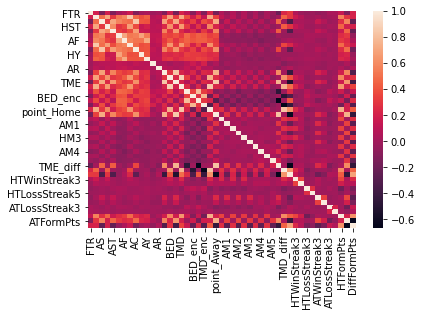

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(dataset.corr(method="pearson"), ax=ax)

In [ ]:
#dataset=pd.read_csv(chemin+'LARGE.csv')

In [ ]:
#fig, ax = plt.subplots()
#sns.heatmap(dataset.corr(method="pearson"), ax=ax)

In [ ]:
len(dataset.columns)

47

In [ ]:
#dataset.drop(['final1',	'final2'],axis=1, inplace=True)

On   observe quand meme une forte correlation entre certains attributs, pour l'instant nous n'allons pas encore les supprimer

TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
data=dataset.drop(columns=['FTR'])

In [ ]:
data

HS         AS       HST  ...  HTFormPts  ATFormPts  DiffFormPts
0      0.000000   0.000000  0.000000  ...        0.0        0.0          0.0
1      0.000000   0.000000  0.000000  ...        0.0        0.0          0.0
2      0.000000   0.000000  0.000000  ...        0.0        0.0          0.0
3      0.000000   0.000000  0.000000  ...        0.0        0.0          0.0
4      0.000000   0.000000  0.000000  ...        0.0        0.0          0.0
...         ...        ...       ...  ...        ...        ...          ...
2655  11.026316  13.421053  6.368421  ...        3.0        7.0         -4.0
2656  10.500000  11.552632  5.236842  ...        5.0        7.0         -2.0
2657  14.157895   8.421053  8.026316  ...        5.0        1.0          4.0
2658  11.894737  11.394737  6.157895  ...        0.0        3.0         -3.0
2659   9.447368   9.789474  5.315789  ...        5.0        4.0          1.0

[2660 rows x 46 columns]

In [ ]:
Scaler = StandardScaler()
data= Scaler.fit_transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, dataset['FTR'], 
    test_size=0.33,shuffle=True,random_state=42)

In [ ]:
pd.DataFrame(X_train)

0         1         2   ...        43        44        45
0     0.058347 -0.111458  0.666778  ... -0.717119 -0.466531 -0.193157
1     0.119571 -0.223446  0.742755  ... -0.717119  0.162925 -0.695402
2     0.651909 -0.064134  1.450113  ...  0.556907 -0.151803  0.560212
3    -1.501761 -2.496805 -0.648207  ... -1.354132 -0.781258 -0.444280
4    -1.140318 -0.249576 -0.402743  ... -0.398612  0.477653 -0.695402
...        ...       ...       ...  ...       ...       ...       ...
1777 -0.288344 -1.033493  0.701844  ...  0.556907 -0.151803  0.560212
1778  1.159778  1.004691  0.385716  ...  2.149440  1.421836  0.560212
1779  1.278365 -0.318341  0.411163  ... -0.080106  1.421836 -1.197648
1780  1.422059  0.462482  0.579112  ...  0.556907  0.477653  0.057966
1781 -0.276608 -0.943224 -1.072190  ... -1.354132 -0.151803 -0.946525

[1782 rows x 46 columns]

In [ ]:
lgr=LogisticRegression(max_iter=500) 
dtree=DecisionTreeClassifier(criterion="entropy")
randomForest=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [ ]:
def evaluate_models(clfs, names, X_train,y_train,X_test,y_test,N=5,gridSearchCv=False):
    
    scores = {}
    best = None
    best_score = 0
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    print("CROSS VALIDATION OVER "+str(N)+" FOLDS")
    print("=======================================")

    for clf, name in zip(clfs, names):
        scores[clf] = cross_validate(clf, X_train, y_train, 
                                     return_train_score=True, cv=N,
                                     return_estimator=True)
        
        train_scores = scores[clf]["train_score"]
        valid_scores = scores[clf]["test_score"]
        test_scores = [est_clf.score(X_test, y_test) for est_clf in scores[clf]["estimator"]]

        print(name)
        print("\tTraining time mean: %.2f" % np.mean(scores[clf]["fit_time"]))
        print("\tTrain mean: %.2f" % np.mean(train_scores))
        print("\tValidation mean: %.2f" % np.mean(valid_scores))     
        print("\tTest: %.2f" % clf.fit(X_train, y_train).score(X_test, y_test))
        if(gridSearchCv):
            print("\tBest parameters", clf.best_params_)
        print()
        
        if(np.mean(valid_scores) > best_score):
            best_score = np.mean(valid_scores)
            best = clf
            best_name = name
            
    print("Best Classifier (according to validation): ", best_name, "with mean score %.2f" % best_score)

In [ ]:
models_class=[lgr,dtree,randomForest]
models_names_class=[lgr.__class__.__name__ ,
                    dtree.__class__.__name__ ,
                    randomForest.__class__.__name__ ]

In [ ]:
evaluate_models(models_class,models_names_class,X_train,y_train,X_test,y_test)

CROSS VALIDATION OVER 5 FOLDS
LogisticRegression
	Training time mean: 0.06
	Train mean: 0.54
	Validation mean: 0.51
	Test: 0.53

DecisionTreeClassifier
	Training time mean: 0.08
	Train mean: 0.98
	Validation mean: 0.42
	Test: 0.40

RandomForestClassifier
	Training time mean: 0.47
	Train mean: 0.98
	Validation mean: 0.49
	Test: 0.51

Best Classifier (according to validation):  LogisticRegression with mean score 0.51


In [ ]:
lgr=LogisticRegression(max_iter=500)

In [ ]:
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lgr.score(X_train,y_train)

0.5280583613916947

In [ ]:
lgr.score(X_test,y_test)

0.5250569476082004

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp.score(X_train,y_train)

0.7065095398428731

In [ ]:
mlp.score(X_test,y_test)

0.4521640091116173